<a href="https://www.kaggle.com/marcorochauribe/co2-per-type-over-time?scriptVersionId=89940431" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import altair as alt

import matplotlib.pyplot as plt

from functools import reduce

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/0db0ed38-868c-40d2-bcbd-bcedb88543cf/sample_submission.csv
/kaggle/input/0db0ed38-868c-40d2-bcbd-bcedb88543cf/engine_metadata.csv
/kaggle/input/0db0ed38-868c-40d2-bcbd-bcedb88543cf/site_metadata.csv
/kaggle/input/0db0ed38-868c-40d2-bcbd-bcedb88543cf/dataset/dataset/data_141.csv
/kaggle/input/0db0ed38-868c-40d2-bcbd-bcedb88543cf/dataset/dataset/data_202.csv
/kaggle/input/0db0ed38-868c-40d2-bcbd-bcedb88543cf/dataset/dataset/data_26.csv
/kaggle/input/0db0ed38-868c-40d2-bcbd-bcedb88543cf/dataset/dataset/data_165.csv
/kaggle/input/0db0ed38-868c-40d2-bcbd-bcedb88543cf/dataset/dataset/data_124.csv
/kaggle/input/0db0ed38-868c-40d2-bcbd-bcedb88543cf/dataset/dataset/data_178.csv
/kaggle/input/0db0ed38-868c-40d2-bcbd-bcedb88543cf/dataset/dataset/data_33.csv
/kaggle/input/0db0ed38-868c-40d2-bcbd-bcedb88543cf/dataset/dataset/data_49.csv
/kaggle/input/0db0ed38-868c-40d2-bcbd-bcedb88543cf/dataset/dataset/data_79.csv
/kaggle/input/0db0ed38-868c-40d2-bcbd-bcedb88543cf/dataset/dataset/data

In [2]:
def sum_df(*args):
    dataframes = []
    for arg in args:
        csv_file = pd.read_csv(f"/kaggle/input/0db0ed38-868c-40d2-bcbd-bcedb88543cf/dataset/dataset/{arg}", index_col=0)
   #     csv_file["Dates"] = pd.to_datetime(csv_file["Dates"])
        csv_file.index.name = "Date"
        csv_file = csv_file.fillna(0)
        csv_file.index = pd.to_datetime(csv_file.index)
        dataframes.append(
            csv_file.fillna(0)
        )
#    return dataframes
    return reduce(lambda x, y: x.add(y, fill_value=0), dataframes)

In [3]:
def multitable_dataframe(df, group, selected_group):
    """Return the sum of the selected tables
    """
    select = df.groupby(group)["FILE_ID"].apply(list)[selected_group]
    return sum_df(*select)

In [4]:
engine_metadata = pd.read_csv("/kaggle/input/0db0ed38-868c-40d2-bcbd-bcedb88543cf/engine_metadata.csv")

In [5]:
engine1 = multitable_dataframe(engine_metadata, "ENGINE_ID", "ENGINE_1")
engine2 = multitable_dataframe(engine_metadata, "ENGINE_ID", "ENGINE_2")
engine3 = multitable_dataframe(engine_metadata, "ENGINE_ID", "ENGINE_3")
engine4 = multitable_dataframe(engine_metadata, "ENGINE_ID", "ENGINE_4")
engine5 = multitable_dataframe(engine_metadata, "ENGINE_ID", "ENGINE_5")
engine6 = multitable_dataframe(engine_metadata, "ENGINE_ID", "ENGINE_6")
engine7 = multitable_dataframe(engine_metadata, "ENGINE_ID", "ENGINE_7")
engine8 = multitable_dataframe(engine_metadata, "ENGINE_ID", "ENGINE_8")

In [6]:
source = pd.DataFrame()

source["Engine_1"] = engine1["CO2"]
source["Engine_2"] = engine2["CO2"]
source["Engine_3"] = engine3["CO2"]
source["Engine_4"] = engine4["CO2"]
source["Engine_5"] = engine5["CO2"]
source["Engine_6"] = engine6["CO2"]
source["Engine_7"] = engine7["CO2"]
source["Engine_8"] = engine8["CO2"]

In [7]:
source

,Engine_1,Engine_2,Engine_3,Engine_4,Engine_5,Engine_6,Engine_7,Engine_8
Date,,,,,,,,
2021-01-01 00:00:00,37.099493,34.774350,37.959853,29.781394,22.751010,11.787187,13.077426,5.330225
2021-01-01 01:00:00,37.106932,34.768733,37.984244,27.659429,22.755084,11.793963,13.053306,5.336479
2021-01-01 02:00:00,37.126830,34.741024,38.013723,27.665178,22.749814,11.801526,13.051227,5.338449
2021-01-01 03:00:00,37.121096,34.767240,38.000679,27.653720,22.745628,11.788145,13.045610,5.338497
2021-01-01 04:00:00,37.102841,34.732098,36.438351,29.886667,22.768591,11.794436,13.081963,5.346432
...,...,...,...,...,...,...,...,...
2021-12-31 20:00:00,62.331985,57.884619,52.837890,45.169486,40.803128,20.434102,10.916496,4.364303
2021-12-31 21:00:00,62.355240,57.857215,52.822834,45.184637,40.791727,20.425087,10.925484,4.360130
2021-12-31 22:00:00,62.338078,57.816000,52.834004,45.192912,40.821060,20.425806,10.921984,4.364069


<AxesSubplot:xlabel='Date'>

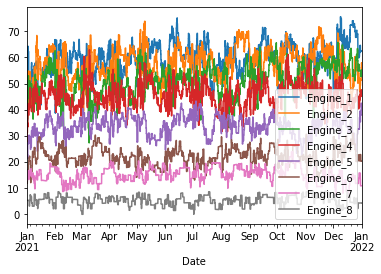

In [8]:
source.plot()